In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        images = data.reshape(num, rows, cols)
    return images



def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [3]:
# Load training data
x_train = load_images("train-images.idx3-ubyte")
y_train = load_labels("train-labels.idx1-ubyte")

# Load testing data
x_test = load_images("t10k-images.idx3-ubyte")
y_test = load_labels("t10k-labels.idx1-ubyte")

print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)


Training set: (60000, 28, 28) (60000,)
Testing set: (10000, 28, 28) (10000,)


In [4]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape (CNN expects 4D: samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("After reshape:", x_train.shape, x_test.shape)


After reshape: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes → digits 0-9
])

# Show model summary
model.summary()


c:\Users\priyanshu\Desktop\Skill\vnb\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    x_train, y_train,
    epochs=5,                # Number of passes through dataset
    batch_size=64,           # How many samples per training step
    validation_data=(x_test, y_test)  # Check accuracy on test set during training
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9552 - loss: 0.1532 - val_accuracy: 0.9865 - val_loss: 0.0437
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.9855 - loss: 0.0453 - val_accuracy: 0.9878 - val_loss: 0.0400
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9914 - val_loss: 0.0244
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9920 - val_loss: 0.0252
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9882 - val_loss: 0.0370


In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print("✅ Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9882 - loss: 0.0370
✅ Test Accuracy: 0.9882000088691711


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


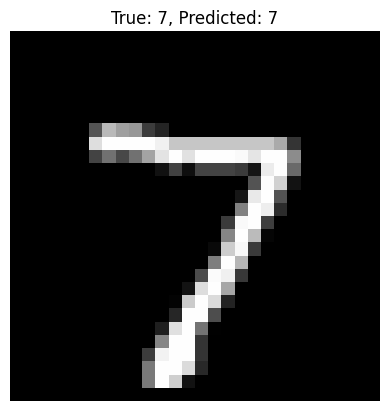

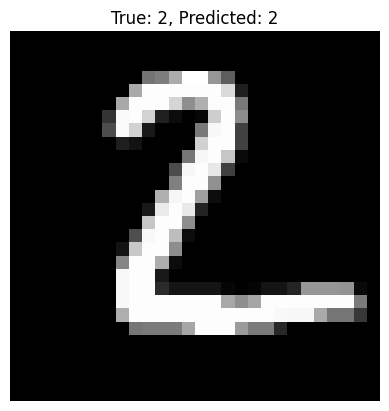

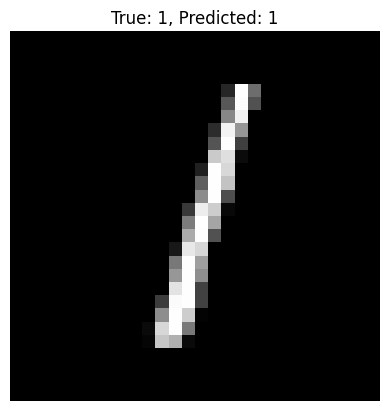

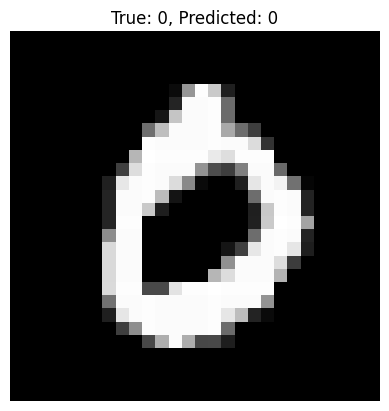

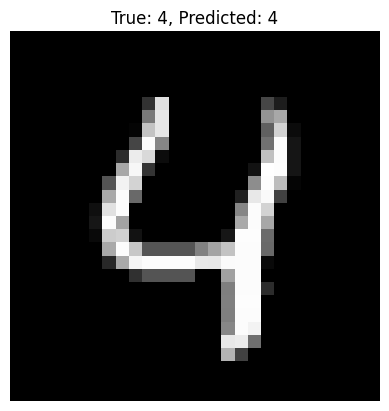

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for first 5 test images
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()


In [10]:
# Save model in new Keras format
model.save("digit_recognizer.keras")
